In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import numpy as np
import os

In [8]:
df= pd.read_csv('radiomics_train_proba.csv')
cols = df.columns.tolist()
cols = cols[:2] + [cols[-1]] + cols[2:-1]
df = df[cols]
df.to_csv('radiomics_train_proba.csv',index=False)

In [2]:
df_label = pd.read_csv('3classes/df_all.csv')
test_set =  ['CAD-226', 'NU_Patient_0008', 'AHN21', 'CAD-205', 'CAD-181', 'CAD-233', 'nyu_Patient_0128', 'CAD-314', 'CAD-41', 'nyu_Patient_0169', 'CAD-232', 'CAD-306', 'CAD-73', 'CAD-196', 'CAD-218', 'CAD-204', 'nyu_Patient_0016', 'CAD-256', 'nyu_Patient_0133', 'CAD-39', 'nyu_Patient_0010', 'nyu_Patient_0108', 'CAD-249', 'NU_Patient_0005', 'CAD-311', 'MCA45', 'MCA140', 'nyu_Patient_0100', 'MCF_10', 'nyu_Patient_0050', 'CAD-152', 'CAD-310', 'nyu_Patient_0168', 'NU_Patient_0004', 'MCA48', 'MCF_20', 'nyu_Patient_0001', 'CAD-316', 'MCA126', 'CAD-272', 'nyu_Patient_0026', 'CAD-160', 'CAD-68', 'CAD-139', 'MCF_16', 'CAD-81', 'MCA75', 'nyu_Patient_0013', 'CAD-241']
train_set = [p for p in df_label['patient'].tolist() if p not in test_set]

print(len(train_set))

197


In [4]:
df1 = pd.read_csv('3classes/radiomics_proba.csv')
# Predict the class based on the maximum probability
df1['preds'] = df1[['class0', 'class1', 'class2']].idxmax(axis=1)

# Remove the 'class' prefix and convert to int
df1['preds'] = df1['preds'].str.replace('class', '').astype(int)

print(df1)

              patient  label    class0    class1    class2  preds
0             CAD-226      2  0.074374  0.222155  0.703470      2
1     NU_Patient_0008      0  0.753797  0.237998  0.008205      0
2               AHN21      2  0.667668  0.149699  0.182633      0
3             CAD-205      2  0.005140  0.639978  0.354883      1
4             CAD-181      1  0.009730  0.282351  0.707919      2
..                ...    ...       ...       ...       ...    ...
241  nyu_Patient_0150      1  0.047405  0.949107  0.003488      1
242            MCF_42      2  0.752722  0.230506  0.016772      0
243             MCA02      1  0.007015  0.954073  0.038911      1
244           CAD-252      2  0.047067  0.060106  0.892827      2
245           CAD-262      2  0.518101  0.476513  0.005386      0

[246 rows x 6 columns]


In [5]:
train_data = df1[df1['patient'].isin(train_set)]
test_data = df1[df1['patient'].isin(test_set)]

# print(test_data)
test_data.to_csv('radiomics_test_proba.csv',index=False)
train_data.to_csv('radiomics_train_proba.csv',index=False)

### Dataframe organization

In [ ]:
df = pd.read_csv('/home/lys6602/Radiomics/Classifier-Transformer-IPMN/Transformer-IPMN/utils/label_3c.csv')
df = df[~df['patient'].str.startswith('AHN')]
df = df[~df['patient'].str.startswith('MCA')]
df = df[~df['patient'].str.startswith('MCF')]
df = df[~df['patient'].str.startswith('nyu')]
df = df[~df['patient'].str.startswith('NU')]

df.to_csv('/home/lys6602/Radiomics/Classifier-Transformer-IPMN/Transformer-IPMN/utils/label_3c_proper.csv',index=False)

In [5]:
#extract label from csv file
df = pd.read_csv('3classes/df_all.csv')
df_subset = df.iloc[:, :2]

print(df_subset)
df_subset.to_csv('3classes/df_label.csv',index=False)

              patient  label
0             CAD-226      2
1     NU_Patient_0008      0
2               AHN21      2
3             CAD-205      2
4             CAD-181      1
..                ...    ...
241  nyu_Patient_0150      1
242            MCF_42      2
243             MCA02      1
244           CAD-252      2
245           CAD-262      2

[246 rows x 2 columns]


#### Raplace label3 with label2

In [4]:
df=pd.read_csv('4classes/df_all.csv')
print(df['label'].value_counts())

df['label'] = df['label'].replace(3, 2)
print(df['label'].value_counts())

df.to_csv('3classes/df_all.csv',index=False)

1    85
0    70
3    49
2    42
Name: label, dtype: int64
2    91
1    85
0    70
Name: label, dtype: int64


In [14]:
df = pd.read_csv('3classes/uvscaling_t.csv')
df_DL = pd.read_excel('3classes/df_DL.xlsx')
df = df.merge(df_DL,on='patient')
print(df.shape)

df.to_csv('3classes/uvscaling_t_DL.csv',index=False)


(246, 215)
(98, 216)


In [3]:
df_radiomics = pd.read_csv('4classes/df_radiomics.csv')
df_volume = pd.read_csv('4classes/df_volume.csv')
df_label = pd.read_csv('4classes/df_label.csv')

df_all = df_radiomics.merge(df_volume,on='patient')
df_all = df_all.merge(df_label,on='patient')

label_col = df_all.pop('label')
df_all.insert(1, 'label', label_col)

print(df_all)
df_all.to_csv('4classes/df_all.csv',index=False)

              patient  label  t2_original_shape_Elongation  \
0             CAD-226      3                      0.203461   
1     NU_Patient_0008      0                      0.276844   
2               AHN21      2                      0.286540   
3             CAD-205      2                      0.333113   
4             CAD-181      1                      0.430892   
..                ...    ...                           ...   
241  nyu_Patient_0150      1                      0.340620   
242            MCF_42      3                      0.386985   
243             MCA02      1                      0.324041   
244           CAD-252      2                      0.287407   
245           CAD-262      3                      0.215489   

     t2_original_shape_Flatness  t2_original_shape_LeastAxisLength  \
0                      0.032063                           6.441570   
1                      0.184613                          21.465922   
2                      0.180356              

In [2]:
# df_nyu = pd.read_csv('label_nyu.csv')
# df_nyu['patient'] = df_nyu['patient'].apply(lambda x: 'nyu_' + x)
# df_nyu.to_csv('label_nyu.csv',index=False)

folder = '/data/Lanhong/Pancreas_radiomics/MICCAI/t2/raw'
for f in os.listdir(folder):
    if f.startswith('AHN'):
        print(f.split('.')[0])
        

AHN21
AHN33
AHN58
AHN41
AHN80
AHN30
AHN02
AHN11
AHN27
AHN39
AHN37
AHN44
AHN09
AHN23
AHN79
AHN61
AHN29
AHN16
AHN51
AHN77
AHN12
AHN36
AHN38
AHN19
AHN48
AHN75
AHN64
AHN05
AHN54
AHN35
AHN47
AHN28


In [3]:
df = pd.read_csv('df_label_AHN.csv')
df['label']=0

df.to_csv('df_label_AHN.csv',index=False)

In [ ]:
df_center1 = pd.read_csv("label.csv")
df_center2 = pd.read_csv("/data/datasets/pancreas_ipmn/mayo_florida/ipmn_label.csv")

df_center2.to_csv('label_mcf.csv',header=['patient','label'],index=False)
df_center2 = pd.read_csv('label_mcf.csv')
# df_center1.drop(columns=['Unnamed: 0'],inplace=True)
print(df_center2)

df_concat = pd.concat([df_center1, df_center2], axis=0)
# df_concat.drop(columns=['Unnamed: 0'],inplace=True)
df_concat.drop_duplicates(subset='patient', inplace=True)


### Data from ClustVis

In [5]:
df = pd.read_csv('3classes/uvscaling_t2.csv').T

df.columns = df.iloc[0]
df = df[1:]
print(df)

df.to_csv('3classes/uvscaling_t2_t.csv')

#manually set the first column title = 'patient'

Unnamed: 0       t2_original_shape_Elongation t2_original_shape_Flatness  \
CAD-226                              -1.48161                  -0.859867   
NU_Patient_0008                     -0.540025                   0.757858   
AHN21                               -0.419686                    0.71561   
CAD-205                              0.145997                  -0.982514   
CAD-181                               1.27197                  -0.621701   
...                                       ...                        ...   
nyu_Patient_0150                     0.235327                   0.140026   
MCF_42                               0.776191                   0.860806   
MCA02                               0.0373713                    1.08309   
CAD-252                             -0.408965                  -0.916895   
CAD-262                               -1.3234                   -1.04404   

Unnamed: 0       t2_original_shape_LeastAxisLength  \
CAD-226                          

In [6]:
df = pd.read_csv('3classes/uvscaling_t2_t.csv')
df_label = pd.read_csv('3classes/df_label.csv')

df = df.merge(df_label,on='patient')
label_col = df.pop('label')
df.insert(1, 'label', label_col)
print(df)
df.to_csv('3classes/uvscaling_t2_t.csv',index=False)

              patient  label  t2_original_shape_Elongation  \
0             CAD-226      2                     -1.481607   
1     NU_Patient_0008      0                     -0.540025   
2               AHN21      2                     -0.419686   
3             CAD-205      2                      0.145997   
4             CAD-181      1                      1.271965   
..                ...    ...                           ...   
241  nyu_Patient_0150      1                      0.235327   
242            MCF_42      2                      0.776191   
243             MCA02      1                      0.037371   
244           CAD-252      2                     -0.408965   
245           CAD-262      2                     -1.323405   

     t2_original_shape_Flatness  t2_original_shape_LeastAxisLength  \
0                     -0.859867                          -0.675359   
1                      0.757858                           0.660978   
2                      0.715610              

### 3D Visulization

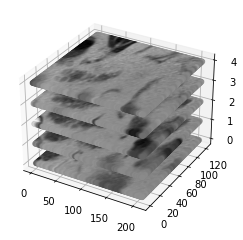

In [3]:
# Load the NIfTI image using nibabel
file_name = "/data/Lanhong/Pancreas_radiomics/mayo_v1/mayo_v1_cropped_T2/CAD-03/irene_1_AX_HASTE_BH.nii.gz"
img = nib.load(file_name)

# Extract the image data
data = img.get_fdata()

# Plot the image using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D image
X, Y, Z = data.nonzero()
ax.scatter(X, Y, Z, c=data[data.nonzero()], cmap='gray')

# Show the plot
plt.show()